LIBRERIAS






In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)

In [6]:
df = pd.read_csv('satelites.csv')

Principales Operadores

In [80]:
operadores = df.groupby(['Operator/Owner'])['Operator/Owner'].count().nlargest(10)
operadores

Operator/Owner
SpaceX                                       1655
OneWeb Satellites                             288
Planet Labs, Inc.                             188
Chinese Ministry of National Defense          129
Spire Global Inc.                             121
Swarm Technologies                            120
Ministry of Defense                           109
Iridium Communications, Inc.                   75
SES S.A.                                       48
Indian Space Research Organization (ISRO)      44
Name: Operator/Owner, dtype: int64

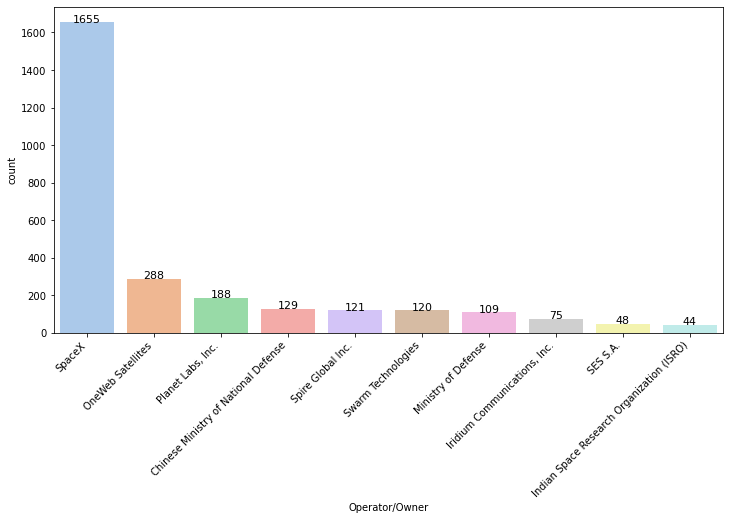

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Operator/Owner', order=df['Operator/Owner'].value_counts().iloc[:10].index, ax=ax, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
plt.show()

Principales Países

In [8]:
paises = df.groupby(['Country of Operator/Owner'])['Country of Operator/Owner'].count().nlargest(10)
paises

Country of Operator/Owner
USA               2769
China              461
United Kingdom     345
Russia             165
Japan               84
Multinational       62
ESA                 60
India               58
Canada              53
Germany             44
Name: Country of Operator/Owner, dtype: int64

In [9]:
df

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Contractor,Country of Contractor,Launch Site,Launch Vehicle
0,1HOPSAT-TD (1st-generation High Optical Perfor...,Lemur,NR (12/20),USA,Hera Systems,Commercial,Earth Observation,LEO,0,566.0,576.0,0.000720,36.90,96.08,22.0,2019-12-11,Hera Systems,USA,Satish Dhawan Space Centre,PSLV
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,LEO,0,497.0,517.0,0.001454,97.45,94.70,4.5,2017-06-23,Aalto University,Finland,Satish Dhawan Space Centre,PSLV
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,0,442.0,687.0,0.017665,98.20,95.90,1.0,2016-04-25,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,75,35778.0,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,-75,35700.0,35700.0,0.000000,0.00,1436.10,1800.0,2016-06-15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Ziyuan 1-02C,Ziyuan 1-02C,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,763.0,773.0,0.000700,98.56,100.20,1500.0,2011-12-22,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4546,Ziyuan 1-2D,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,748.0,758.0,0.000702,98.50,99.80,2650.0,2019-09-14,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4547,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,500.0,504.0,0.000291,97.50,94.70,2650.0,2012-01-09,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4548,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,487.0,500.0,0.000947,97.50,94.49,2630.0,2016-05-29,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B


Lanzamientos últimos 25 años

In [10]:
df['Date of Launch'] = pd.to_datetime(df['Date of Launch'])
year_values = pd.DatetimeIndex(df['Date of Launch']).year
df.insert(10, 'Year of Launch', year_values) #Creamos columna año lanzamiento
lanzamientos = df.groupby(pd.DatetimeIndex(df['Date of Launch']).year)['Date of Launch'].count().tail(25)



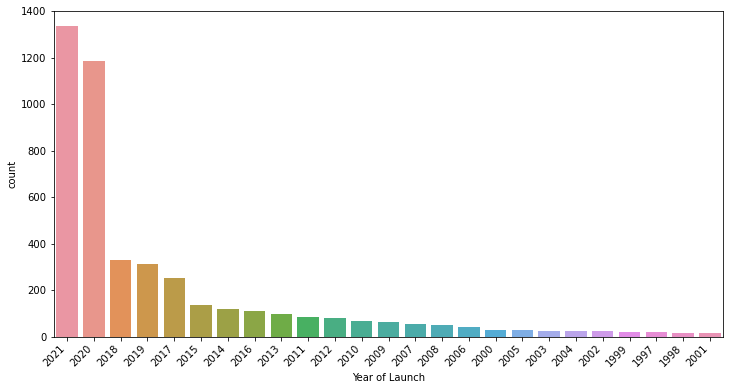

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='Year of Launch', order=df['Year of Launch'].value_counts().iloc[:25].index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


Lanzadera

<AxesSubplot:xlabel='Launch Vehicle', ylabel='count'>

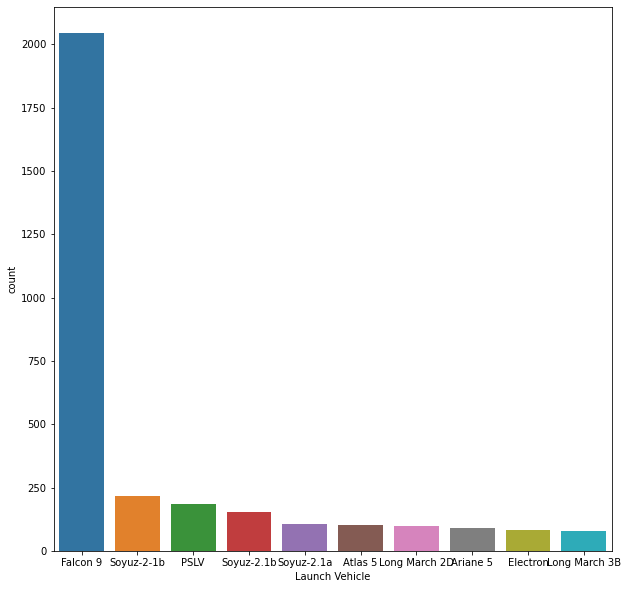

In [12]:
lanzadera = df.groupby(['Launch Vehicle'])['Launch Vehicle'].count().nlargest(10)
sns.countplot(data=df, x='Launch Vehicle', order=df['Launch Vehicle'].value_counts().iloc[:10].index)

Órbita

<AxesSubplot:xlabel='Class of Orbit', ylabel='count'>

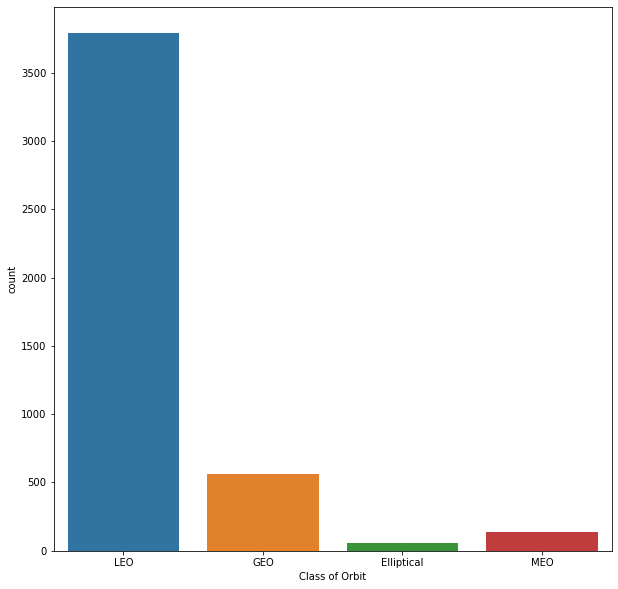

In [13]:
orbita = df.groupby(['Class of Orbit'])['Class of Orbit'].count().nlargest(5)
sns.countplot(data=df, x='Class of Orbit')


In [59]:
df2 = df[['Country of Operator/Owner', 'Date of Launch', 'Year of Launch', 'Launch Vehicle', 'Class of Orbit']].copy()
df2

,Country of Operator/Owner,Date of Launch,Year of Launch,Launch Vehicle,Class of Orbit
0,USA,2019-12-11,2019,PSLV,LEO
1,Finland,2017-06-23,2017,PSLV,LEO
2,Denmark,2016-04-25,2016,Soyuz-2.1a,LEO
3,Multinational,2014-02-06,2014,Ariane 5 ECA,GEO
4,Multinational,2016-06-15,2016,Falcon 9,GEO
...,...,...,...,...,...
4545,China,2011-12-22,2011,Long March 4B,LEO
4546,China,2019-09-14,2019,Long March 4B,LEO
4547,China,2012-01-09,2012,Long March 4B,LEO
4548,China,2016-05-29,2016,Long March 4B,LEO


In [15]:
df_dum = pd.get_dummies(df2) 

In [16]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Columns: 273 entries, Year of Launch to Class of Orbit_MEO
dtypes: int64(1), uint8(272)
memory usage: 1.2 MB


In [17]:
df.isna().sum()

Name of Satellite, Alternate Names      0
Current Official Name of Satellite      0
Country/Org of UN Registry              1
Country of Operator/Owner               0
Operator/Owner                          0
Users                                   0
Purpose                                 0
Class of Orbit                          0
Longitude of GEO (degrees)              1
Perigee (km)                            0
Year of Launch                          0
Apogee (km)                             0
Eccentricity                            0
Inclination (degrees)                   0
Period (minutes)                        4
Launch Mass (kg.)                     236
Date of Launch                          0
Contractor                              1
Country of Contractor                   1
Launch Site                             1
Launch Vehicle                          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Name of Satellite, Alternate Names  4550 non-null   object        
 1   Current Official Name of Satellite  4550 non-null   object        
 2   Country/Org of UN Registry          4549 non-null   object        
 3   Country of Operator/Owner           4550 non-null   object        
 4   Operator/Owner                      4550 non-null   object        
 5   Users                               4550 non-null   object        
 6   Purpose                             4550 non-null   object        
 7   Class of Orbit                      4550 non-null   object        
 8   Longitude of GEO (degrees)          4549 non-null   object        
 9   Perigee (km)                        4550 non-null   float64       
 10  Year of Launch          

In [19]:
df_falcon9 = df.loc[df['Launch Vehicle']== 'Falcon 9']

In [20]:
df_falcon9 = df.loc[df['Launch Vehicle']== 'Falcon 9'].groupby(['Country of Operator/Owner']).count()
#lanzadera = df.groupby(['Launch Vehicle'])['Launch Vehicle'].count().nlargest(10)

In [21]:
df_falcon9

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Operator/Owner,Users,Purpose,Class of Orbit,Longitude of GEO (degrees),Perigee (km),Year of Launch,Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Contractor,Country of Contractor,Launch Site,Launch Vehicle
Country of Operator/Owner,,,,,,,,,,,,,,,,,,,,
Argentina,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Australia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bangladesh,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Belgium,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Bulgaria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Canada,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
China,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ESA,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Egypt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
df_orbit = df.groupby(['Class of Orbit']).count()


In [23]:
df_orbit

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Longitude of GEO (degrees),Perigee (km),Year of Launch,Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Contractor,Country of Contractor,Launch Site,Launch Vehicle
Class of Orbit,,,,,,,,,,,,,,,,,,,,
Elliptical,57,57,57,57,57,57,57,57,57,57,57,57,57,57,50,57,57,57,57,57
GEO,564,564,564,564,564,564,564,564,564,564,564,564,564,564,526,564,564,564,564,564
LEO,3790,3790,3789,3790,3790,3790,3790,3789,3790,3790,3790,3790,3790,3786,3601,3790,3789,3789,3789,3790
MEO,139,139,139,139,139,139,139,139,139,139,139,139,139,139,137,139,139,139,139,139


In [24]:
df2

,Country of Operator/Owner,Year of Launch,Launch Vehicle,Class of Orbit
0,USA,2019,PSLV,LEO
1,Finland,2017,PSLV,LEO
2,Denmark,2016,Soyuz-2.1a,LEO
3,Multinational,2014,Ariane 5 ECA,GEO
4,Multinational,2016,Falcon 9,GEO
...,...,...,...,...
4545,China,2011,Long March 4B,LEO
4546,China,2019,Long March 4B,LEO
4547,China,2012,Long March 4B,LEO
4548,China,2016,Long March 4B,LEO


In [53]:
df_last10y = df.loc[(df2['Launch Vehicle']== 'Falcon 9') | (df2['Year of Launch'] > 2011)]
df_last10y

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Class of Orbit,Longitude of GEO (degrees),Perigee (km),...,Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Date of Launch,Contractor,Country of Contractor,Launch Site,Launch Vehicle
0,1HOPSAT-TD (1st-generation High Optical Perfor...,Lemur,NR (12/20),USA,Hera Systems,Commercial,Earth Observation,LEO,0,566.0,...,576.0,0.000720,36.90,96.08,22.0,2019-12-11,Hera Systems,USA,Satish Dhawan Space Centre,PSLV
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,LEO,0,497.0,...,517.0,0.001454,97.45,94.70,4.5,2017-06-23,Aalto University,Finland,Satish Dhawan Space Centre,PSLV
2,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,LEO,0,442.0,...,687.0,0.017665,98.20,95.90,1.0,2016-04-25,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,75,35778.0,...,35793.0,0.000178,0.08,1436.03,6330.0,2014-02-06,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,-75,35700.0,...,35700.0,0.000000,0.00,1436.10,1800.0,2016-06-15,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,Zhuhai 1-07 (OHS-4),OHS-4,China,China,Zhuhai Orbita Aerospace Science and Technology...,Commercial,Earth Observation,LEO,0,491.0,...,511.0,0.001455,97.40,94.60,90.0,2018-04-26,Zhuhai Orbita Aerospace Science and Technology...,China,Jiuquan Satellite Launch Center,Long March 11
4546,Ziyuan 1-2D,Ziyuan 1-2D,NR,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,748.0,...,758.0,0.000702,98.50,99.80,2650.0,2019-09-14,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4547,Ziyuan 3 (ZY-3),Ziyuan 3,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,500.0,...,504.0,0.000291,97.50,94.70,2650.0,2012-01-09,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B
4548,Ziyuan 3-2,Ziyuan 3-2,China,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,LEO,0,487.0,...,500.0,0.000947,97.50,94.49,2630.0,2016-05-29,China Academy of Space Technology (CAST),China,Taiyuan Launch Center,Long March 4B


In [90]:
#TODOS LOS SATELITES LANZADOS A TODAS LAS ORBITAS. CUANTOS SE HAN LANZADO DESDE EL FALCON9 Y CUANTOS NO
pd.crosstab(index=df['Launch Vehicle']=='Falcon 9', columns=df['Class of Orbit']=='LEO')

Class of Orbit,False,True
Launch Vehicle,,
False,721,1784
True,39,2006


In [55]:
pd.crosstab(index=df['Launch Vehicle']=='Falcon 9', columns=df['Class of Orbit']).apply(lambda r: r/r.sum() *100, axis=0)

Class of Orbit,Elliptical,GEO,LEO,MEO
Launch Vehicle,,,,
False,98.245614,93.971631,47.07124,97.122302
True,1.754386,6.028369,52.92876,2.877698


In [56]:
df_last10y_count = df_last10y.groupby(['Year of Launch'])['Launch Vehicle'].count()
df_last10y_count

Year of Launch
2012      81
2013      98
2014     118
2015     137
2016     111
2017     254
2018     329
2019     312
2020    1184
2021    1336
Name: Launch Vehicle, dtype: int64

C:\Users\Victor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Launch Vehicle'>

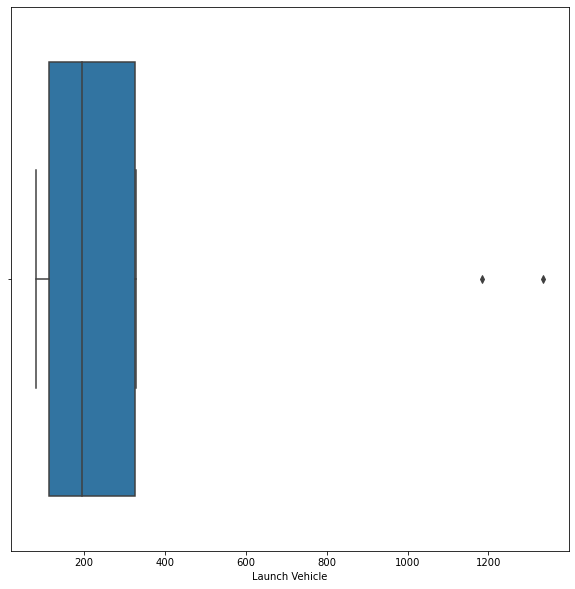

In [57]:
sns.boxplot(df_last10y_count)

<AxesSubplot:xlabel='Year of Launch'>

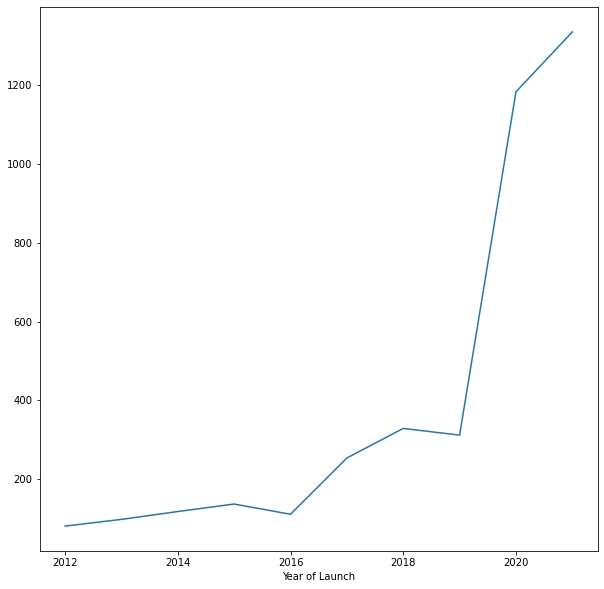

In [30]:
df_last10y_count.plot()

Existe una diferencia muy significativa en cuanto a nº de lanzamientos en los últimos 2 años.

<AxesSubplot:xlabel='Date of Launch', ylabel='Class of Orbit'>

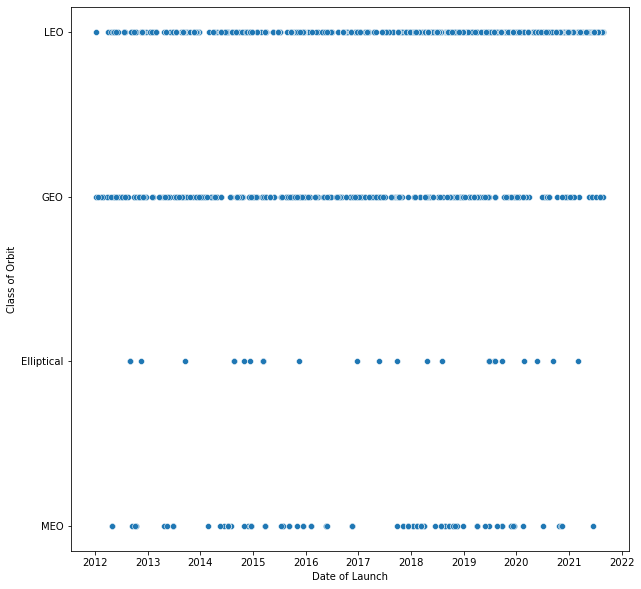

In [69]:
sns.scatterplot(x='Date of Launch',
                y='Class of Orbit',
                data=df_last10y)

Por tipo de órbita, existe una diferencia significativa en cuanto a los años de lanzamiento, en los que predominan órbita terrestre baja (LEO) y La órbita geosíncrona (GEO). 

In [32]:
df_last10y.groupby(['Year of Launch']).count()

,Country of Operator/Owner,Launch Vehicle,Class of Orbit
Year of Launch,,,
2012,81,81,81
2013,98,98,98
2014,118,118,118
2015,137,137,137
2016,111,111,111
2017,254,254,254
2018,329,329,329
2019,312,312,312
2020,1184,1184,1184


In [33]:
df_last10y

,Country of Operator/Owner,Year of Launch,Launch Vehicle,Class of Orbit
0,USA,2019,PSLV,LEO
1,Finland,2017,PSLV,LEO
2,Denmark,2016,Soyuz-2.1a,LEO
3,Multinational,2014,Ariane 5 ECA,GEO
4,Multinational,2016,Falcon 9,GEO
...,...,...,...,...
4544,China,2018,Long March 11,LEO
4546,China,2019,Long March 4B,LEO
4547,China,2012,Long March 4B,LEO
4548,China,2016,Long March 4B,LEO
